In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
data = pd.read_csv('IOT_Data.csv', on_bad_lines='skip')


In [28]:
data

,Dst Port,Protocol,Tot Fwd Pkts,Tot Bwd Pkts,Bwd Pkt Len Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,FIN Flag Cnt,...,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Label
0,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Benign
1,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Benign
2,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Benign
3,22,6,15,10,0,0,0,0,0,0,...,0,0,0,6,32,0,0,0,0,Benign
4,22,6,14,11,0,0,0,0,0,0,...,0,0,0,6,32,0,0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8642,80,6,2,0,0,1,0,0,0,0,...,0,0,0,0,20,0,0,0,0,Benign
8643,80,6,5,6,0,0,0,0,0,0,...,0,0,0,3,20,0,0,0,0,Benign
8644,80,6,3,0,0,0,0,0,0,0,...,0,0,0,1,20,0,0,0,0,Benign
8645,80,17,1,1,131,0,0,0,0,0,...,0,0,0,0,8,0,0,0,0,Benign


In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance
print("Network Traffic Data IOT...........")

df_data = data.drop(['Label'], axis=1)
print(df_data)
print("Attack Types")
data.Label.value_counts()


Network Traffic Data IOT...........
      Dst Port  Protocol  Tot Fwd Pkts  Tot Bwd Pkts  Bwd Pkt Len Min  \
0            0         0             3             0                0   
1            0         0             3             0                0   
2            0         0             3             0                0   
3           22         6            15            10                0   
4           22         6            14            11                0   
...        ...       ...           ...           ...              ...   
8642        80         6             2             0                0   
8643        80         6             5             6                0   
8644        80         6             3             0                0   
8645        80        17             1             1              131   
8646        80         0             3             0                0   

      Fwd PSH Flags  Bwd PSH Flags  Fwd URG Flags  Bwd URG Flags  \
0                 0

FTP-BruteForce    8062
Benign             585
Name: Label, dtype: int64

In [31]:
#data preprocessing
features = data.dtypes[data.dtypes != 'object'].index
data[features] = data[features].apply(
    lambda x: (x - x.mean()) / (x.std()))
#fill empty value by 0
data= data.fillna(0)
data_pre = data.drop(['Label'], axis=1)
print("Data preprocessing")
print(data_pre)


Data preprocessing
      Dst Port  Protocol  Tot Fwd Pkts  Tot Bwd Pkts  Bwd Pkt Len Min  \
0    -1.643049 -5.468053      1.080631     -0.449958        -0.072848   
1    -1.643049 -5.468053      1.080631     -0.449958        -0.072848   
2    -1.643049 -5.468053      1.080631     -0.449958        -0.072848   
3    -0.171115 -0.034456      8.274948      3.532015        -0.072848   
4    -0.171115 -0.034456      7.675421      3.930212        -0.072848   
...        ...       ...           ...           ...              ...   
8642  3.709439 -0.034456      0.481105     -0.449958        -0.072848   
8643  3.709439 -0.034456      2.279684      1.939226        -0.072848   
8644  3.709439 -0.034456      1.080631     -0.449958        -0.072848   
8645  3.709439  9.927138     -0.118422     -0.051761        10.231676   
8646  3.709439 -5.468053      1.080631     -0.449958        -0.072848   

      Fwd PSH Flags  Bwd PSH Flags  Fwd URG Flags  Bwd URG Flags  \
0         -0.069019            0.0  

In [32]:
data.head(3)

,Dst Port,Protocol,Tot Fwd Pkts,Tot Bwd Pkts,Bwd Pkt Len Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,FIN Flag Cnt,...,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Label
0,-1.643049,-5.468053,1.080631,-0.449958,-0.072848,-0.069019,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.118055,-6.291794,0.0,0.0,0.0,0.0,Benign
1,-1.643049,-5.468053,1.080631,-0.449958,-0.072848,-0.069019,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.118055,-6.291794,0.0,0.0,0.0,0.0,Benign
2,-1.643049,-5.468053,1.080631,-0.449958,-0.072848,-0.069019,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.118055,-6.291794,0.0,0.0,0.0,0.0,Benign


In [33]:
import seaborn as sb

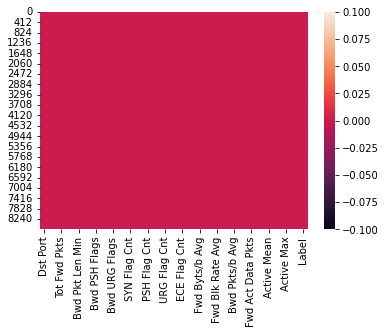

In [34]:
sb.heatmap(data.isnull())

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8647 entries, 0 to 8646
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dst Port           8647 non-null   float64
 1   Protocol           8647 non-null   float64
 2   Tot Fwd Pkts       8647 non-null   float64
 3   Tot Bwd Pkts       8647 non-null   float64
 4   Bwd Pkt Len Min    8647 non-null   float64
 5   Fwd PSH Flags      8647 non-null   float64
 6   Bwd PSH Flags      8647 non-null   float64
 7   Fwd URG Flags      8647 non-null   float64
 8   Bwd URG Flags      8647 non-null   float64
 9   FIN Flag Cnt       8647 non-null   float64
 10  SYN Flag Cnt       8647 non-null   float64
 11  RST Flag Cnt       8647 non-null   float64
 12  PSH Flag Cnt       8647 non-null   float64
 13  ACK Flag Cnt       8647 non-null   float64
 14  URG Flag Cnt       8647 non-null   float64
 15  CWE Flag Count     8647 non-null   float64
 16  ECE Flag Cnt       8647 

In [36]:
DT = DecisionTreeClassifier()

In [37]:
data

,Dst Port,Protocol,Tot Fwd Pkts,Tot Bwd Pkts,Bwd Pkt Len Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,FIN Flag Cnt,...,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Label
0,-1.643049,-5.468053,1.080631,-0.449958,-0.072848,-0.069019,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.118055,-6.291794,0.0,0.0,0.0,0.0,Benign
1,-1.643049,-5.468053,1.080631,-0.449958,-0.072848,-0.069019,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.118055,-6.291794,0.0,0.0,0.0,0.0,Benign
2,-1.643049,-5.468053,1.080631,-0.449958,-0.072848,-0.069019,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.118055,-6.291794,0.0,0.0,0.0,0.0,Benign
3,-0.171115,-0.034456,8.274948,3.532015,-0.072848,-0.069019,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.442129,-1.055936,0.0,0.0,0.0,0.0,Benign
4,-0.171115,-0.034456,7.675421,3.930212,-0.072848,-0.069019,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.442129,-1.055936,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8642,3.709439,-0.034456,0.481105,-0.449958,-0.072848,14.487172,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.118055,-3.019383,0.0,0.0,0.0,0.0,Benign
8643,3.709439,-0.034456,2.279684,1.939226,-0.072848,-0.069019,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.162037,-3.019383,0.0,0.0,0.0,0.0,Benign
8644,3.709439,-0.034456,1.080631,-0.449958,-0.072848,-0.069019,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.641976,-3.019383,0.0,0.0,0.0,0.0,Benign
8645,3.709439,9.927138,-0.118422,-0.051761,10.231676,-0.069019,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.118055,-4.982830,0.0,0.0,0.0,0.0,Benign


In [38]:
X= data[['Dst Port','Protocol','Tot Fwd Pkts','Active Mean','Active Std','Active Max','Active Min']]
y=data[['Label']]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)

In [42]:
#Decision Tree Classifier to DETECT IOT Attack 
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [43]:
start = time.time()
print('program starting')
print()

DT.fit(X_train, y_train)
print()

print('prediction:')
y_pred = DT.predict(X_test)
print(y_pred)
print()

print('Score')
score= DT.score(X_test, y_test)
print(score)

end = time.time()
print('program has ended')
print()

print('time cost:') 
print(end - start, 'seconds')

program starting


prediction:
['Benign' 'Benign' 'FTP-BruteForce' ... 'FTP-BruteForce' 'FTP-BruteForce'
 'FTP-BruteForce']

Score
1.0
program has ended

time cost:
0.03423905372619629 seconds


In [44]:
print("Classification Report")
print(classification_report(y_test,y_pred))

 

Classification Report
                precision    recall  f1-score   support

        Benign       1.00      1.00      1.00       111
FTP-BruteForce       1.00      1.00      1.00      1619

      accuracy                           1.00      1730
     macro avg       1.00      1.00      1.00      1730
  weighted avg       1.00      1.00      1.00      1730



In [45]:
#Naive Bays model

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import time
import numpy as np


In [46]:
for col in data.columns:
  print(col)

 

Dst Port
Protocol
Tot Fwd Pkts
Tot Bwd Pkts
Bwd Pkt Len Min
Fwd PSH Flags
Bwd PSH Flags
Fwd URG Flags
Bwd URG Flags
FIN Flag Cnt
SYN Flag Cnt
RST Flag Cnt
PSH Flag Cnt
ACK Flag Cnt
URG Flag Cnt
CWE Flag Count
ECE Flag Cnt
Down/Up Ratio
Fwd Byts/b Avg
Fwd Pkts/b Avg
Fwd Blk Rate Avg
Bwd Byts/b Avg
Bwd Pkts/b Avg
Bwd Blk Rate Avg
Fwd Act Data Pkts
Fwd Seg Size Min
Active Mean
Active Std
Active Max
Active Min
Label


In [47]:
print(data.columns.tolist())

['Dst Port', 'Protocol', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'Bwd Pkt Len Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Label']


In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
normalized_x = scaler.transform(X)
normalized_x


 

array([[0.        , 0.        , 0.01851852, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01851852, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01851852, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.18058691, 0.35294118, 0.01851852, ..., 0.        , 0.        ,
        0.        ],
       [0.18058691, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.18058691, 0.        , 0.01851852, ..., 0.        , 0.        ,
        0.        ]])

In [49]:

from sklearn.naive_bayes import GaussianNB

In [50]:
X_train, X_test, y_train, y_test = train_test_split(normalized_x, y, random_state=100, test_size=0.2)
 

In [51]:
clf = GaussianNB()
clf.fit(X_train, y_train)

 

GaussianNB()

In [52]:
start = time.time()
print('program starting')
print()

clf = GaussianNB().fit(X_train, y_train)
print()
print(clf.score(X_test, y_test))
print()

y_pred = clf.fit(X_train, y_train).predict(X_test)
print(y_pred)
print()

end = time.time()
print('Program has been ended ')
print()
print('Time COST')
print(end - start, 'seconds')


program starting


1.0

['FTP-BruteForce' 'FTP-BruteForce' 'FTP-BruteForce' ... 'FTP-BruteForce'
 'FTP-BruteForce' 'FTP-BruteForce']

Program has been ended 

Time COST
0.04795718193054199 seconds


In [54]:
print("Classifiction Report :")
print(classification_report(y_test, y_pred))

Classifiction Report :
                precision    recall  f1-score   support

        Benign       1.00      1.00      1.00       129
FTP-BruteForce       1.00      1.00      1.00      1601

      accuracy                           1.00      1730
     macro avg       1.00      1.00      1.00      1730
  weighted avg       1.00      1.00      1.00      1730



In [56]:
#SVM Support Vector Classifier
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import time
import numpy as np

In [58]:
SVM_classifier = SVC()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

In [59]:
start = time.time()
print('Program has working to start')
print()

SVM_classifier = SVC(C=1.0, cache_size=1500, verbose=True).fit(X_train, y_train)
print()
print(SVM_classifier.score(X_test, y_test))
print()

y_pred = SVM_classifier.predict(X_test)
print(y_pred)
print()

end = time.time()
print('Program has ended')
print()
print('time cost')
print(end - start, 'seconds')


Program has working to start

[LibSVM]
1.0

['Benign' 'Benign' 'FTP-BruteForce' ... 'FTP-BruteForce' 'FTP-BruteForce'
 'FTP-BruteForce']

Program has ended

time cost
0.07349491119384766 seconds


In [60]:
print("Classificaton Report")
print(classification_report(y_test, y_pred))


Classificaton Report
                precision    recall  f1-score   support

        Benign       1.00      1.00      1.00       111
FTP-BruteForce       1.00      1.00      1.00      1619

      accuracy                           1.00      1730
     macro avg       1.00      1.00      1.00      1730
  weighted avg       1.00      1.00      1.00      1730

